In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Load the data
train = pd.read_csv('train.csv')
train.head()

,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  428 non-null    int64 
 1   Text       428 non-null    object
 2   Category   428 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.2+ KB


In [99]:
# class distribution
train['Category'].value_counts()

Category
tech             216
entertainment    212
Name: count, dtype: int64

0      [lifestyle, governs, mobile, choice, faster, b...
1      [french, honour, director, parker, british, fi...
2      [fockers, fuel, festive, film, chart, comedy, ...
3      [housewives, lift, channel, 4, ratings, debut,...
4      [u2, desire, number, one, u2, three, prestigio...
                             ...                        
423    [parker, saxophone, heads, auction, saxophone,...
424    [wine, comedy, wins, critics, award, quirky, c...
425    [playstation, 3, processor, unveiled, cell, pr...
426    [briton, wins, short, film, oscar, three, five...
427    [uk, broadband, gets, speed, injection, broadb...
Name: Text, Length: 428, dtype: object

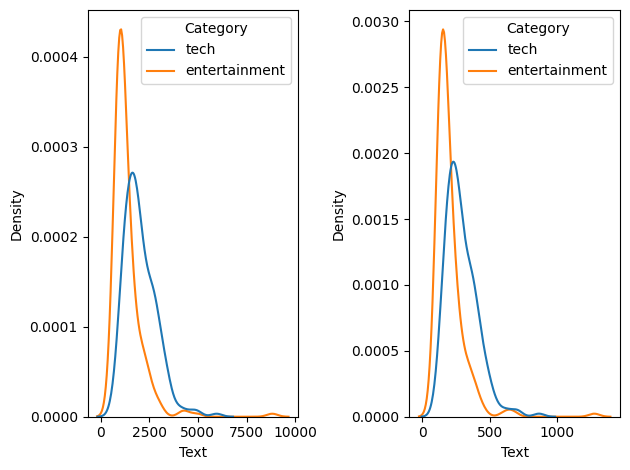

In [121]:
char_lengths = train['Text'].apply(len)
num_words = train['Text'].apply(lambda x: len(x.split(' ')))

plt.subplot(1, 2, 1)
sns.kdeplot(x=char_lengths, hue=train['Category'])
plt.subplot(1, 2, 2)
sns.kdeplot(x=num_words, hue=train['Category'])
plt.tight_layout()

In [92]:
# get word counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
word_counts = cv.fit_transform(train['Text'])
feature_names = cv.get_feature_names_out()

Text(0.5, 1.0, 'Top 10 Most common words')

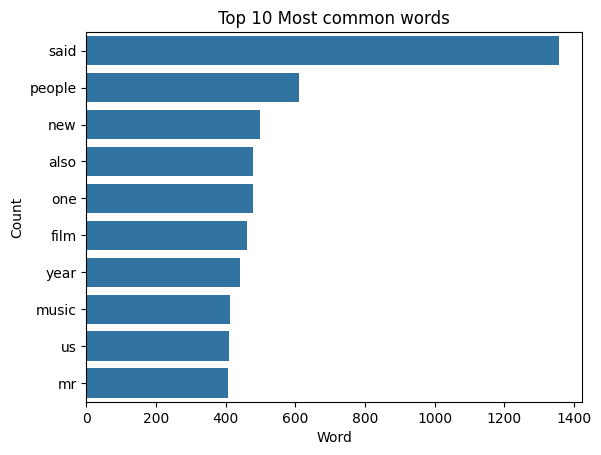

In [93]:
# most common words w/out stop words
word_totals = pd.DataFrame(word_counts.sum(axis=0), columns=feature_names)
word_totals = word_totals.T
word_totals.columns = ['count']
word_totals.sort_values(by='count', ascending=False, inplace=True)

ax = sns.barplot(y=word_totals.index[:10], x=word_totals['count'][:10])
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most common words')

In [94]:
# get bigram counts
cv = CountVectorizer(ngram_range=(2,2))
word_counts = cv.fit_transform(train['Text'])
feature_names = cv.get_feature_names_out()

Text(0.5, 1.0, 'Top 10 Most common bigrams')

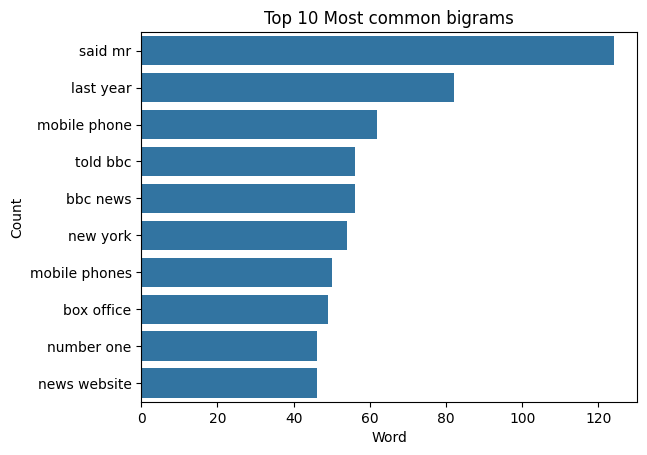

In [95]:
# most common bigrams w/out stop words
word_totals = pd.DataFrame(word_counts.sum(axis=0), columns=feature_names)
word_totals = word_totals.T
word_totals.columns = ['count']
word_totals.sort_values(by='count', ascending=False, inplace=True)

ax = sns.barplot(y=word_totals.index[:10], x=word_totals['count'][:10])
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most common bigrams')

In [96]:
# get trigram counts
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))
word_counts = cv.fit_transform(train['Text'])
feature_names = cv.get_feature_names_out()

Text(0.5, 1.0, 'Top 10 most common trigrams')

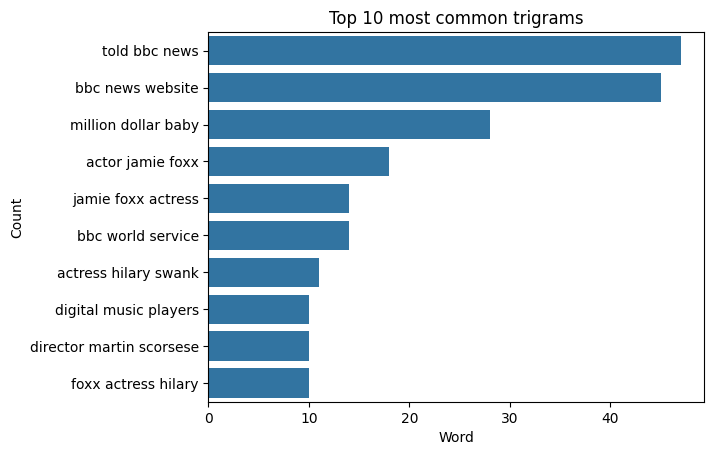

In [97]:
# most common bigrams w/out stop words
word_totals = pd.DataFrame(word_counts.sum(axis=0), columns=feature_names)
word_totals = word_totals.T
word_totals.columns = ['count']
word_totals.sort_values(by='count', ascending=False, inplace=True)

ax = sns.barplot(y=word_totals.index[:10], x=word_totals['count'][:10])
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Top 10 most common trigrams')